# Creación Dataset a partir de Polígonos

Instalación de requerimientos

In [210]:
!pip install xlrd

Librerías

In [1]:
import sys
import datacube
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.patches as patches

from shapely.geometry import Point
from shapely.geometry import Polygon

# sys.path.append("../../Scripts")
# from deafrica_plotting import display_map, rgb

Lectura de un polígono para un predio, el polígono se carga en un GeoDataFrame

<AxesSubplot:>

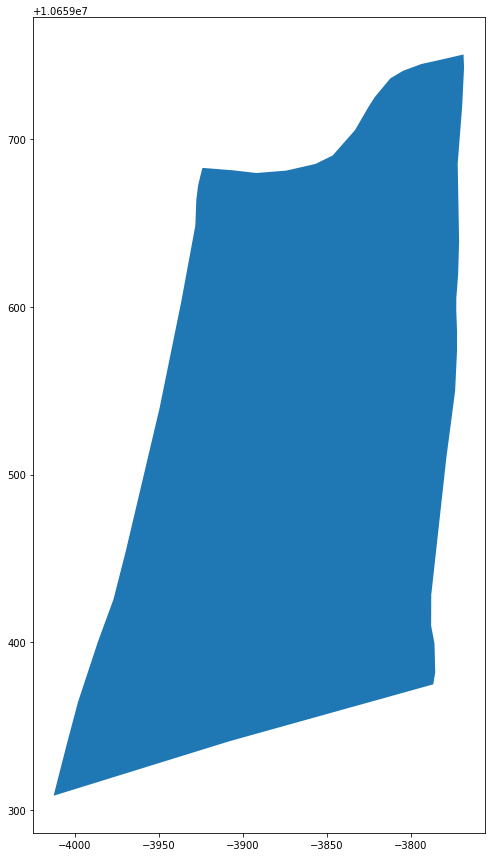

In [2]:
geo_df = gpd.read_file("/analysis_storage/TrainingDataset/001Primer_envio/01_SIA_ASG_51300/predio1/r_terreno.shp")
geo_df = geo_df.to_crs('EPSG:32719')
fig, ax = plt.subplots(figsize=(15,15))
geo_df.plot(ax=ax)

Obtención del polígono del GeoDataframe

In [3]:
predio_1_geometry = geo_df['geometry'][0]

Obtención de los puntos que comprenden el polígono

In [4]:
predio_1_points = list(zip(*predio_1_geometry.exterior.coords.xy))
predio_1_points

[(-3771.563101570704, 10659622.512972847),
 (-3771.6597008609097, 10659619.320153441),
 (-3772.7340197737794, 10659605.124355117),
 (-3772.762856159243, 10659597.516980965),
 (-3772.297380797856, 10659585.342606898),
 (-3772.343293665326, 10659573.170784384),
 (-3773.451431326859, 10659549.845531411),
 (-3778.7062358394032, 10659509.803688193),
 (-3787.6897184610134, 10659428.191834988),
 (-3787.757448289427, 10659409.933701288),
 (-3785.7557796240435, 10659399.273336899),
 (-3785.3087463868433, 10659382.027299417),
 (-3786.4961116936174, 10659374.953884775),
 (-3907.9993336997577, 10659341.029459428),
 (-4012.7939393850393, 10659308.545576254),
 (-4005.015691547189, 10659338.961124137),
 (-3998.2839000166277, 10659364.287293335),
 (-3986.4065495740506, 10659400.240225755),
 (-3977.1220052894787, 10659425.55410408),
 (-3969.8688224865473, 10659453.921876105),
 (-3949.6369473603554, 10659539.536561824),
 (-3936.63450673467, 10659603.379215151),
 (-3933.942507088126, 10659617.941068862),

Creación de polígonos de matplotlib para pintar (plotting)

In [5]:
predio_1_points = np.array(predio_1_points)
predio_1_matplotlib_polygon = patches.Polygon(
    predio_1_points, closed=True, color='red'
)

predio_1_matplotlib_polygon

Pintar polígono en el mapa de Boyacá

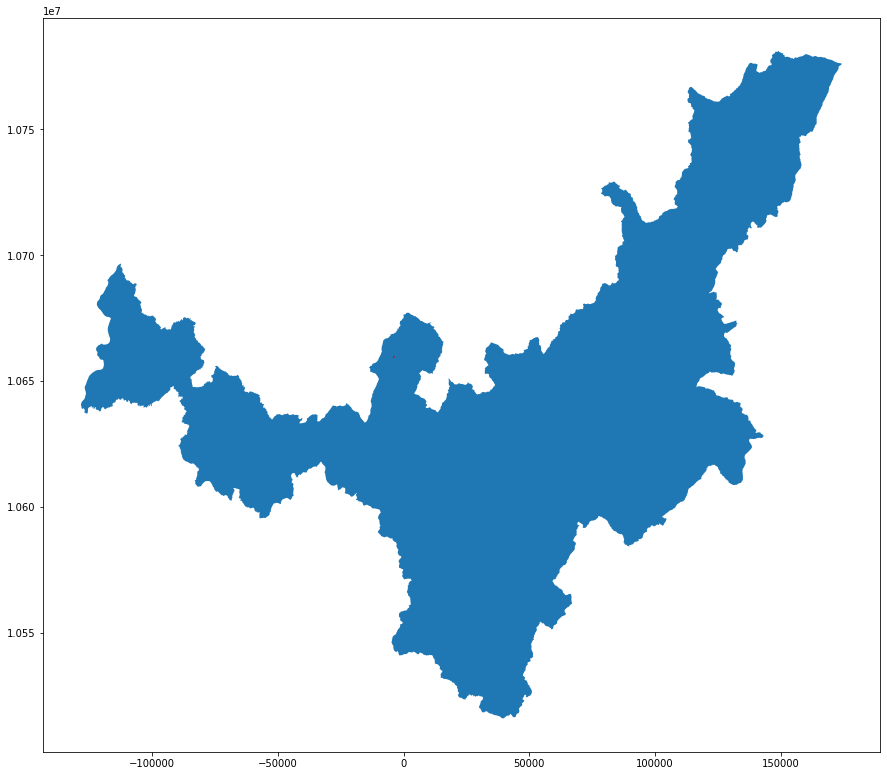

In [6]:
# street_map = gpd.read_file('shape_colombia/MGN_DPTO_POLITICO.shp')
street_map = gpd.read_file('shape_boyaca/MGN_DPTO_POLITICO.shp')
street_map = street_map.to_crs('EPSG:32719')
fig, ax = plt.subplots(figsize=(15,15))
street_map.plot(ax=ax)
ax.add_patch(predio_1_matplotlib_polygon)

Obtención del área cuadrada que comprende el polígono

In [7]:
minx, miny, maxx, maxy = predio_1_geometry.bounds
print(minx, miny, maxx, maxy)

-4012.7939393850393 10659308.545576254 -3768.136839356972 10659750.405602872


In [8]:
study_area_lat = (miny,maxy)
study_area_lon = (minx,maxx)

print('lat:',study_area_lat)
print('lon:',study_area_lon)

lat: (10659308.545576254, 10659750.405602872)
lon: (-4012.7939393850393, -3768.136839356972)


In [17]:
study_area_lat = (4.432483427043751, 5.427551341910499)
study_area_lon = (-74.09868206679943, -73.1064939453459)

In [18]:
# Set the data source - s2a corresponds to Sentinel-2A
set_product = "s2_sen2cor_ard_granule_EO3"

# Set the date range to load data over
set_time = ("2020-08-01", "2020-08-5")

# Set the measurements/bands to load
# For this analysis, we'll load the red, green, blue and near-infrared bands
set_measurements = [
    'B01_60m',
    'B02_10m',
    'B03_10m',
    'B04_10m', 
    'B05_20m',
    'B06_20m',
    'B07_20m',
    'B08_10m',
    'B8A_20m',
    'B09_60m',
    'B11_20m',
    'B12_20m'
]

# Set the coordinate reference system and output resolution
# set_crs = 'EPSG:32719'
set_crs = 'EPSG:32618'

set_resolution = (-10, 10)

set_resampling = 'cubic'


Obtener los datos del area que comprende el polígono en el open data cube

In [19]:
%%time

dc = datacube.Datacube(app="Cana")
dataset = dc.load(
    product=set_product,
    longitude=study_area_lon,
    latitude=study_area_lat,
    time=set_time,
    measurements=set_measurements,
    #crs=set_crs,
    output_crs=set_crs,
    resolution=set_resolution,
    resampling = set_resampling,
)

dataset

CPU times: user 4min 17s, sys: 5.95 s, total: 4min 23s
Wall time: 2min 31s


<xarray.Dataset>
Dimensions:      (time: 2, x: 11027, y: 11027)
Coordinates:
  * time         (time) datetime64[ns] 2020-08-01T20:56:40 2020-08-03T19:24:41
  * y            (y) float64 6.003e+05 6.002e+05 6.002e+05 ... 4.9e+05 4.9e+05
  * x            (x) float64 5.999e+05 5.999e+05 ... 7.101e+05 7.101e+05
    spatial_ref  int32 32618
Data variables:
    B01_60m      (time, y, x) uint16 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0
    B02_10m      (time, y, x) uint16 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0
    B03_10m      (time, y, x) uint16 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0
    B04_10m      (time, y, x) uint16 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0
    B05_20m      (time, y, x) uint16 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0
    B06_20m      (time, y, x) uint16 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0
    B07_20m      (time, y, x) uint16 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0
    B08_10m      (time, y, x) uint16 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0
    B8A_20m      (time, y, x) uint16 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0
    B09_60m      (time, y, x) uint16 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0
    B11_20m      (time, y, x) uint16 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0
    B12_20m      (time, y, x) uint16 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0
Attributes:
    crs:           EPSG:32618
    grid_mapping:  spatial_ref

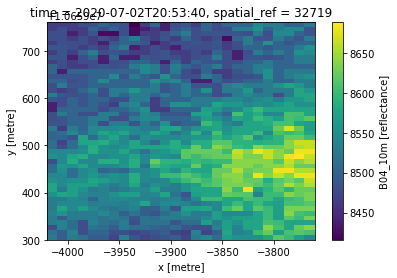

In [221]:
dataset.B04_10m[0].plot()

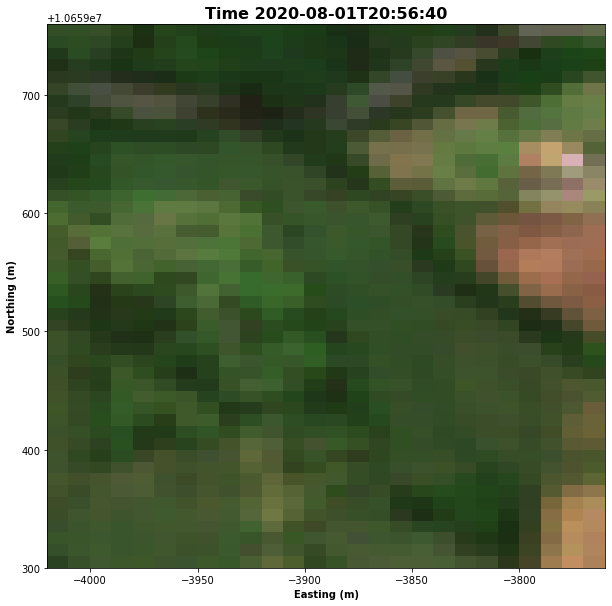

In [222]:
# Set the time step to view
time_index = 10

# Set the band combination to plot
bands = ['B04_10m', 'B03_10m','B02_10m']
# bands = [ "blue","green","red"]

# Format the time stamp for use as the plot title
time_string = str(dataset.time.isel(time=time_index).values).split('.')[0]  

dataset[bands].isel(time=time_index).to_array().plot.imshow(vmin=0,vmax=1500,figsize=(10,10))

# Set the title and axis labels
ax = plt.gca()

ax.set_title(f"Time {time_string}", fontweight='bold', fontsize=16)
ax.set_xlabel('Easting (m)', fontweight='bold')
ax.set_ylabel('Northing (m)', fontweight='bold')

# Display the plot
plt.show()

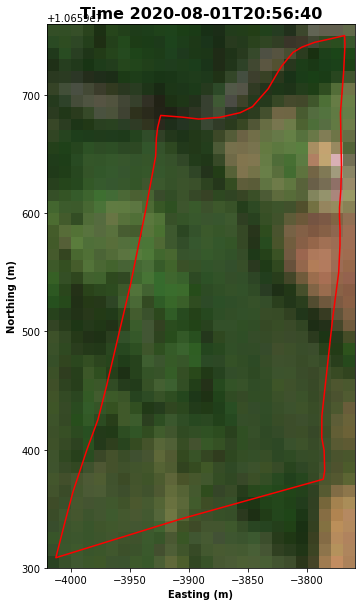

In [223]:
# Set the time step to view
time_index = 10

# Set the band combination to plot
bands = ['B04_10m', 'B03_10m','B02_10m']

# Format the time stamp for use as the plot title
time_string = str(dataset.time.isel(time=time_index).values).split('.')[0]  

dataset[bands].isel(time=time_index).to_array().plot.imshow(vmin=0,vmax=1500,figsize=(10,10))

# Set the title and axis labels
ax = plt.gca()

# Plot the predio 1 shape on datacube true color image
geo_df.boundary.plot(ax=ax,markersize=20,color='red',marker='o')

ax.set_title(f"Time {time_string}", fontweight='bold', fontsize=16)
ax.set_xlabel('Easting (m)', fontweight='bold')
ax.set_ylabel('Northing (m)', fontweight='bold')

# Display the plot
plt.show()

Extracción de los puntos que están dentro del polígono.

In [224]:
%%time

data = []

predio_1_geometry = geo_df['geometry'][0]

for t,time in enumerate(dataset.time.values[:1]):
    for x,lon in enumerate(dataset.y.values):
        for y,lat in enumerate(dataset.x.values):
            point = Point(lat, lon)
            if predio_1_geometry.contains(point):            
                time_slice = str(dataset.time.values[t])
                longitude = lon
                latitude = lat
                red = dataset.B02_10m.values[t,x,y]
                green = dataset.B03_10m.values[t,x,y]
                blue = dataset.B04_10m.values[t,x,y]
                
                row = [time_slice,x,y,longitude, latitude, red, green, blue]
                
                data.append(row)

data[:10]

CPU times: user 467 ms, sys: 0 ns, total: 467 ms
Wall time: 466 ms


[['2020-07-02T20:53:40.000000000',
  1,
  23,
  10659745.0,
  -3785.0,
  9648,
  9024,
  8544],
 ['2020-07-02T20:53:40.000000000',
  1,
  24,
  10659745.0,
  -3775.0,
  9712,
  9048,
  8544],
 ['2020-07-02T20:53:40.000000000',
  2,
  21,
  10659735.0,
  -3805.0,
  9680,
  9072,
  8480],
 ['2020-07-02T20:53:40.000000000',
  2,
  22,
  10659735.0,
  -3795.0,
  9704,
  9056,
  8544],
 ['2020-07-02T20:53:40.000000000',
  2,
  23,
  10659735.0,
  -3785.0,
  9680,
  9024,
  8544],
 ['2020-07-02T20:53:40.000000000',
  2,
  24,
  10659735.0,
  -3775.0,
  9664,
  9056,
  8504],
 ['2020-07-02T20:53:40.000000000',
  3,
  20,
  10659725.0,
  -3815.0,
  9712,
  9008,
  8488],
 ['2020-07-02T20:53:40.000000000',
  3,
  21,
  10659725.0,
  -3805.0,
  9680,
  9048,
  8488],
 ['2020-07-02T20:53:40.000000000',
  3,
  22,
  10659725.0,
  -3795.0,
  9712,
  9080,
  8528],
 ['2020-07-02T20:53:40.000000000',
  3,
  23,
  10659725.0,
  -3785.0,
  9680,
  9072,
  8504]]

In [225]:
columns = ['time','x','y','longitude','latitude', 'red', 'green', 'blue'] 
dataframe = pd.DataFrame(data, columns=columns)
dataframe.head()

,time,x,y,longitude,latitude,red,green,blue
0,2020-07-02T20:53:40.000000000,1,23,10659745.0,-3785.0,9648,9024,8544
1,2020-07-02T20:53:40.000000000,1,24,10659745.0,-3775.0,9712,9048,8544
2,2020-07-02T20:53:40.000000000,2,21,10659735.0,-3805.0,9680,9072,8480
3,2020-07-02T20:53:40.000000000,2,22,10659735.0,-3795.0,9704,9056,8544
4,2020-07-02T20:53:40.000000000,2,23,10659735.0,-3785.0,9680,9024,8544


Validar si los puntos extraidos pertenecen verdaderamente al polígono

In [266]:
geometry = [Point(xy) for xy in zip(dataframe['latitude'],dataframe['longitude'])]
len(geometry)

645

In [263]:
crs = 'EPSG:32719'
geo_df = gpd.GeoDataFrame(dataframe, crs=crs,geometry=geometry)
geo_df = geo_df.round()
geo_df.head()

,time,x,y,longitude,latitude,red,green,blue,geometry
0,2020-07-02T20:53:40.000000000,1,23,10659745.0,-3785.0,9648,9024,8544,POINT (-3785.000 10659745.000)
1,2020-07-02T20:53:40.000000000,1,24,10659745.0,-3775.0,9712,9048,8544,POINT (-3775.000 10659745.000)
2,2020-07-02T20:53:40.000000000,2,21,10659735.0,-3805.0,9680,9072,8480,POINT (-3805.000 10659735.000)
3,2020-07-02T20:53:40.000000000,2,22,10659735.0,-3795.0,9704,9056,8544,POINT (-3795.000 10659735.000)
4,2020-07-02T20:53:40.000000000,2,23,10659735.0,-3785.0,9680,9024,8544,POINT (-3785.000 10659735.000)


Color natural: Sentinel (red,green,blue)

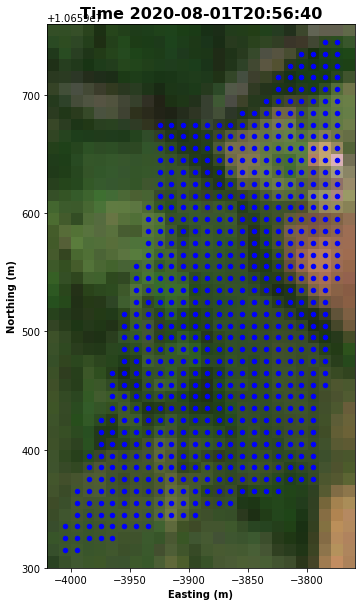

In [265]:
# Set the time step to view
time_index = 10

# Set the band combination to plot
bands = ['B04_10m', 'B03_10m','B02_10m']

# Format the time stamp for use as the plot title
time_string = str(dataset.time.isel(time=time_index).values).split('.')[0]  

dataset[bands].isel(time=time_index).to_array().plot.imshow(vmin=0,vmax=1500,figsize=(10,10))

# Set the title and axis labels
ax = plt.gca()

# Plot the predio 1 shape on datacube true color image
geo_df.plot(ax=ax,markersize=20,color='blue',marker='o')

ax.set_title(f"Time {time_string}", fontweight='bold', fontsize=16)
ax.set_xlabel('Easting (m)', fontweight='bold')
ax.set_ylabel('Northing (m)', fontweight='bold')

# Display the plot
plt.show()

Falso color (para zonas urbanas): Landsat 8 (swir2,swir1,red)

In [132]:
# Set the time step to view
time_index = 0

# Set the band combination to plot
bands = ["swir2","swir1","red"]

# Format the time stamp for use as the plot title
time_string = str(dataset.time.isel(time=time_index).values).split('.')[0]  

dataset[bands].isel(time=time_index).to_array().plot.imshow(vmin=0,vmax=1500,figsize=(10,10))

# Set the title and axis labels
ax = plt.gca()

# Plot the predio 1 shape on datacube true color image
geo_df.plot(ax=ax,markersize=20,color='blue',marker='o')

ax.set_title(f"Time {time_string}", fontweight='bold', fontsize=16)
ax.set_xlabel('Easting (m)', fontweight='bold')
ax.set_ylabel('Northing (m)', fontweight='bold')

# Display the plot
plt.show()

KeyError: 'swir2'

Infrarrojo (para vegetación): Landsat 8 (nir,red,green)

In [133]:
# Set the time step to view
time_index = 0

# Set the band combination to plot
bands = ["nir","red","green"]

# Format the time stamp for use as the plot title
time_string = str(dataset.time.isel(time=time_index).values).split('.')[0]  

dataset[bands].isel(time=time_index).to_array().plot.imshow(vmin=0,vmax=1500,figsize=(10,10))

# Set the title and axis labels
ax = plt.gca()

# Plot the predio 1 shape on datacube true color image
geo_df.plot(ax=ax,markersize=20,color='blue',marker='o')

ax.set_title(f"Time {time_string}", fontweight='bold', fontsize=16)
ax.set_xlabel('Easting (m)', fontweight='bold')
ax.set_ylabel('Northing (m)', fontweight='bold')

# Display the plot
plt.show()

KeyError: 'nir'

Agricultura: Landsat 8 (swir1,nir,blue)

In [ ]:
# Set the time step to view
time_index = 0

# Set the band combination to plot
bands = ["swir1","nir","blue"]

# Format the time stamp for use as the plot title
time_string = str(dataset.time.isel(time=time_index).values).split('.')[0]  

dataset[bands].isel(time=time_index).to_array().plot.imshow(vmin=0,vmax=1500,figsize=(10,10))

# Set the title and axis labels
ax = plt.gca()

# Plot the predio 1 shape on datacube true color image
geo_df.plot(ax=ax,markersize=20,color='blue',marker='o')

ax.set_title(f"Time {time_string}", fontweight='bold', fontsize=16)
ax.set_xlabel('Easting (m)', fontweight='bold')
ax.set_ylabel('Northing (m)', fontweight='bold')

# Display the plot
plt.show()

Penetración de radiación en atmósfera: Landsat 8 (swir2,swir1,nir)

In [ ]:
# Set the time step to view
time_index = 0

# Set the band combination to plot
bands = ["swir2","swir1","nir"]

# Format the time stamp for use as the plot title
time_string = str(dataset.time.isel(time=time_index).values).split('.')[0]  

dataset[bands].isel(time=time_index).to_array().plot.imshow(vmin=0,vmax=1500,figsize=(10,10))

# Set the title and axis labels
ax = plt.gca()

# Plot the predio 1 shape on datacube true color image
geo_df.plot(ax=ax,markersize=20,color='blue',marker='o')

ax.set_title(f"Time {time_string}", fontweight='bold', fontsize=16)
ax.set_xlabel('Easting (m)', fontweight='bold')
ax.set_ylabel('Northing (m)', fontweight='bold')

# Display the plot
plt.show()

Usos del suelo/masas de agua: Landsat 8 (nir,swir1,red)

In [ ]:
# Set the time step to view
time_index = 0

# Set the band combination to plot
bands = ["nir","swir1","red"]

# Format the time stamp for use as the plot title
time_string = str(dataset.time.isel(time=time_index).values).split('.')[0]  

dataset[bands].isel(time=time_index).to_array().plot.imshow(vmin=0,vmax=1500,figsize=(10,10))

# Set the title and axis labels
ax = plt.gca()

# Plot the predio 1 shape on datacube true color image
geo_df.plot(ax=ax,markersize=20,color='blue',marker='o')

ax.set_title(f"Time {time_string}", fontweight='bold', fontsize=16)
ax.set_xlabel('Easting (m)', fontweight='bold')
ax.set_ylabel('Northing (m)', fontweight='bold')

# Display the plot
plt.show()

Infrarrojo de onda corta: Landsat 8 (swir2,nir,red)

In [ ]:
# Set the time step to view
time_index = 0

# Set the band combination to plot
bands = ["swir2","nir","red"]

# Format the time stamp for use as the plot title
time_string = str(dataset.time.isel(time=time_index).values).split('.')[0]  

dataset[bands].isel(time=time_index).to_array().plot.imshow(vmin=0,vmax=1500,figsize=(10,10))

# Set the title and axis labels
ax = plt.gca()

# Plot the predio 1 shape on datacube true color image
geo_df.plot(ax=ax,markersize=20,color='blue',marker='o')

ax.set_title(f"Time {time_string}", fontweight='bold', fontsize=16)
ax.set_xlabel('Easting (m)', fontweight='bold')
ax.set_ylabel('Northing (m)', fontweight='bold')

# Display the plot
plt.show()

Análisis de vegetación: Landsat 8 (swir1,nir,red)

In [ ]:
# Set the time step to view
time_index = 0

# Set the band combination to plot
bands = ["swir1","nir","red"]

# Format the time stamp for use as the plot title
time_string = str(dataset.time.isel(time=time_index).values).split('.')[0]  

dataset[bands].isel(time=time_index).to_array().plot.imshow(vmin=0,vmax=1500,figsize=(10,10))

# Set the title and axis labels
ax = plt.gca()

# Plot the predio 1 shape on datacube true color image
geo_df.plot(ax=ax,markersize=20,color='blue',marker='o')

ax.set_title(f"Time {time_string}", fontweight='bold', fontsize=16)
ax.set_xlabel('Easting (m)', fontweight='bold')
ax.set_ylabel('Northing (m)', fontweight='bold')

# Display the plot
plt.show()

Análisis de vegetación sana: Landsat 8 (nir,swir1,blue)

In [ ]:
# Set the time step to view
time_index = 0

# Set the band combination to plot
bands = ["nir","swir1","blue"]

# Format the time stamp for use as the plot title
time_string = str(dataset.time.isel(time=time_index).values).split('.')[0]  

dataset[bands].isel(time=time_index).to_array().plot.imshow(vmin=0,vmax=1500,figsize=(10,10))

# Set the title and axis labels
ax = plt.gca()

# Plot the predio 1 shape on datacube true color image
geo_df.plot(ax=ax,markersize=20,color='blue',marker='o')

ax.set_title(f"Time {time_string}", fontweight='bold', fontsize=16)
ax.set_xlabel('Easting (m)', fontweight='bold')
ax.set_ylabel('Northing (m)', fontweight='bold')

# Display the plot
plt.show()

Índice NDVI: Landsat 8 (nir-red)/(nir+red)

In [ ]:
dataset["ndvi"] = (dataset.nir-dataset.red)/(dataset.nir+dataset.red)

# Set the title and axis labels
ax = plt.gca()

# Plot NDVI
dataset.ndvi[0].plot(ax=ax)

# Plot the predio 1 shape on datacube true color image
geo_df.plot(ax=ax,markersize=20,color='red',marker='o')

Índice NDWI: Landsat 8 (green-nir)/(green+nir)

In [ ]:
dataset["ndwi"] = (dataset.green-dataset.nir)/(dataset.green+dataset.nir)

# Set the title and axis labels
ax = plt.gca()

# Plot NDWI
dataset.ndwi[0].plot(ax=ax)

# Plot the predio 1 shape on datacube true color image
geo_df.plot(ax=ax,markersize=20,color='red',marker='o')

Índice NDSI: Landsat 8 (green-swir1)/(green+swir1)

In [ ]:
dataset["ndsi"] = (dataset.green-dataset.swir1)/(dataset.green+dataset.swir1)

# Set the title and axis labels
ax = plt.gca()

# Plot NDSI
dataset.ndsi[0].plot(ax=ax)

# Plot the predio 1 shape on datacube true color image
geo_df.plot(ax=ax,markersize=20,color='red',marker='o')